In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
path="C:/Users/nicol/OneDrive/Documentos/VSCLocal/Data/TFM/"
df=pd.read_csv(path+"datos_procesados_3.csv")

In [13]:
df.columns

Index(['price', 'floor', 'propertyType', 'size', 'exterior', 'rooms',
       'bathrooms', 'latitude', 'longitude', 'distance', 'status',
       'newDevelopment', 'hasLift', 'priceByArea', 'parkingSpace',
       'newDevelopmentFinished', 'hasParkingSpace',
       'isParkingSpaceIncludedInPrice', 'parkingSpacePrice'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 1 to 11313
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   price                          7324 non-null   float64
 1   floor                          7324 non-null   int64  
 2   propertyType                   7324 non-null   object 
 3   size                           7324 non-null   float64
 4   exterior                       7324 non-null   int64  
 5   rooms                          7324 non-null   int64  
 6   bathrooms                      7324 non-null   int64  
 7   latitude                       7324 non-null   float64
 8   longitude                      7324 non-null   float64
 9   distance                       7324 non-null   int64  
 10  status                         7324 non-null   object 
 11  newDevelopment                 7324 non-null   int64  
 12  hasLift                        7324 non-null   int64

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Filtramos el Dataframe con los precios menores a 800,000 euros'

df = df[df['price'] <= 800000]

# Selecciona las características (X) y la variable objetivo (Y)
X = df[['priceByArea','floor', 'propertyType', 'size', 'exterior', 'rooms', 'bathrooms', 'distance',
        'latitude', 'longitude', 'status', 'newDevelopment', 'hasLift', 'newDevelopmentFinished',
        'hasParkingSpace','isParkingSpaceIncludedInPrice', 'parkingSpacePrice']]
y = df['price']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformaciones para las variables categóricas
categorical_features = ['propertyType', 'status']
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Define transformaciones para las variables numéricas
numeric_features = ['priceByArea','floor', 'size', 'rooms', 'bathrooms', 'distance','latitude','longitude', 
                    'newDevelopment', 'hasLift', 'newDevelopmentFinished','hasParkingSpace',
                    'isParkingSpaceIncludedInPrice', 'parkingSpacePrice']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define el preprocesamiento de las características
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Combina preprocesamiento y modelo en un pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Entrena el modelo
model.fit(X_train, y_train)

# Evalúa el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
root_mse = root_mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root_Mean Squared Error:", root_mse)

Mean Squared Error: 4240049794.6567926
Root_Mean Squared Error: 65115.66474095763


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Filtramos el Dataframe con los precios menores a 800,000 euros
df = df[df['price'] <= 800000]

# Selecciona las características (X) y la variable objetivo (Y)
X = df[['priceByArea','floor', 'propertyType', 'size', 'exterior', 'rooms', 'bathrooms', 'distance',
        'latitude', 'longitude', 'status', 'newDevelopment', 'hasLift', 'newDevelopmentFinished',
        'hasParkingSpace','isParkingSpaceIncludedInPrice', 'parkingSpacePrice']]
y = df['price']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformaciones para las variables categóricas
categorical_features = ['propertyType', 'status']
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Define transformaciones para las variables numéricas
numeric_features = ['priceByArea','floor', 'size', 'rooms', 'bathrooms', 'distance','latitude','longitude', 
                    'newDevelopment', 'hasLift', 'newDevelopmentFinished','hasParkingSpace',
                    'isParkingSpaceIncludedInPrice', 'parkingSpacePrice']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define el preprocesamiento de las características
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Combina preprocesamiento y modelo en un pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', GradientBoostingRegressor())])

# Entrena el modelo
model.fit(X_train, y_train)

# Evalúa el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
root_mse = root_mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", root_mse)


Mean Squared Error: 272606092.4839357
Root Mean Squared Error: 16510.787155188445


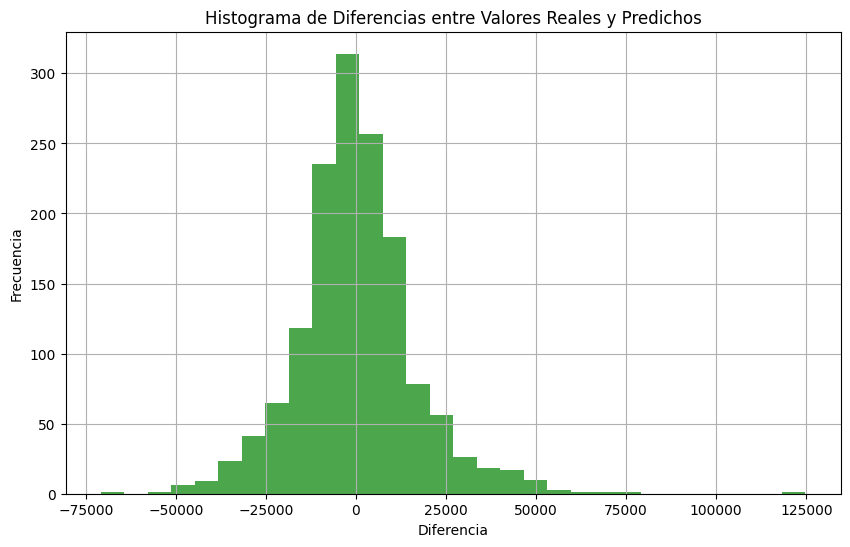

In [17]:
import matplotlib.pyplot as plt

# Calcular las diferencias entre los valores reales y predichos
differences = y_test - y_pred

# Graficar el histograma de las diferencias
plt.figure(figsize=(10, 6))
plt.hist(differences, bins=30, color='green', alpha=0.7)
plt.title('Histograma de Diferencias entre Valores Reales y Predichos')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

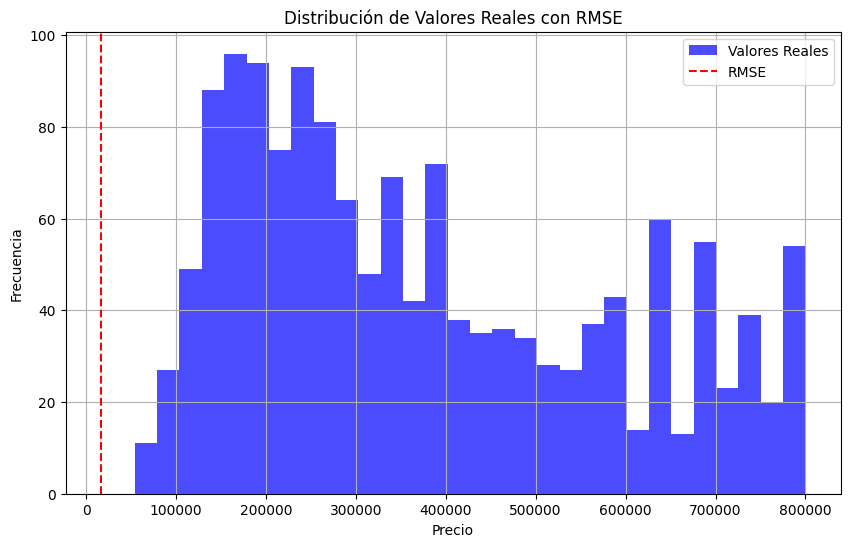

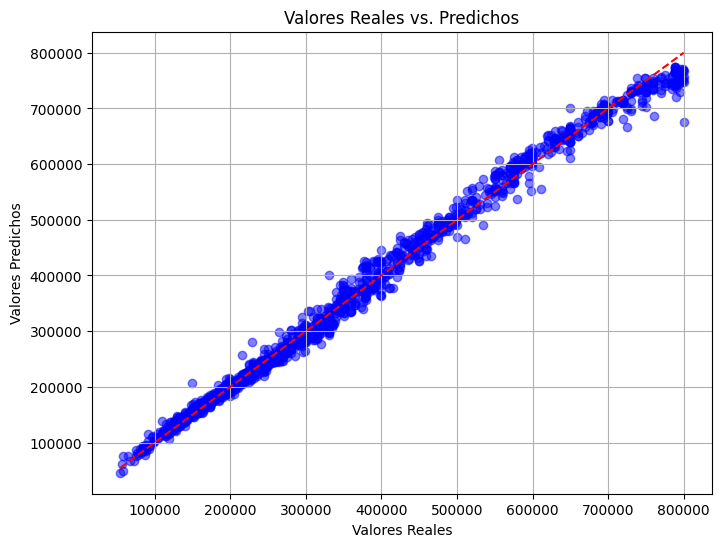

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que y_test contiene los valores reales y y_pred contiene los valores predichos
# También asumiendo que RMSE ya está calculado y almacenado en una variable llamada 'rmse'

# Comparar el RMSE con la distribución de la variable Y ('price')
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, color='blue', alpha=0.7, label='Valores Reales')
plt.axvline(x=root_mse, color='red', linestyle='--', label='RMSE')
plt.title('Distribución de Valores Reales con RMSE')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la relación entre valores reales y predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Valores Reales vs. Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.grid(True)
plt.show()




In [19]:
import pandas as pd

# Supongamos que tienes tu DataFrame llamado df

# Definimos los límites de los tramos
bins = range(0, df['price'].max() + 50000, 50000)

# Etiquetamos los tramos
labels = [f'{i}-{i+49999}' for i in bins[:-1]]

# Creamos una nueva columna en el DataFrame que contendrá los tramos
df['price_bucket'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Mostramos los primeros registros del DataFrame con la nueva columna de bucketing
print(df[['price', 'price_bucket']].head())

TypeError: 'numpy.float64' object cannot be interpreted as an integer

C:\Users\nicol\AppData\Local\Temp\ipykernel_29472\1228958964.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('price_bucket')['price'].count()


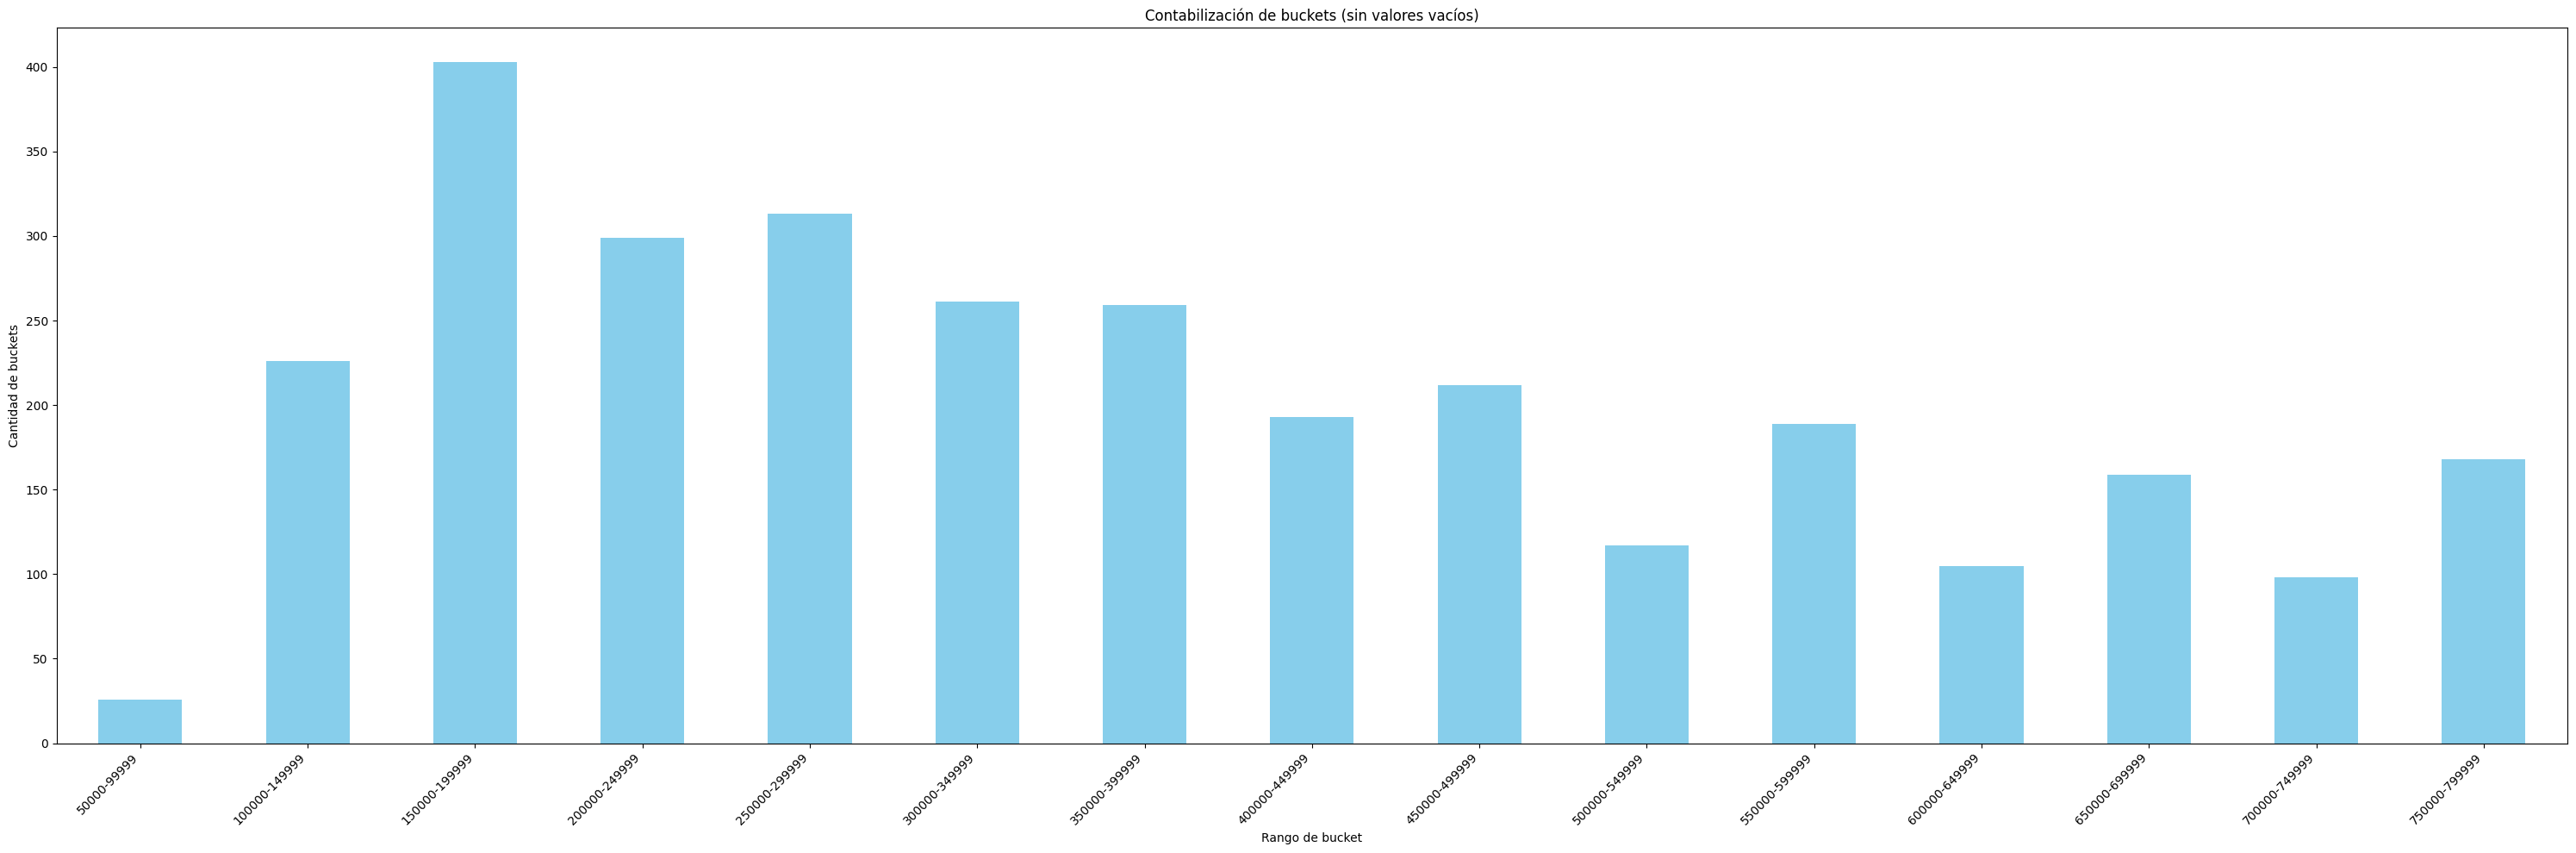

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu DataFrame df con la columna 'price_bucket' creada

# Agrupamos por 'price_bucket' y contamos las observaciones en cada grupo
grouped_data = df.groupby('price_bucket')['price'].count()

# Filtramos los buckets que tienen valores no nulos
grouped_data = grouped_data[grouped_data != 0]

# Creamos el gráfico de barras
plt.figure(figsize=(30, 10))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Contabilización de buckets (sin valores vacíos)')
plt.xlabel('Rango de bucket')
plt.ylabel('Cantidad de buckets')
plt.xticks(rotation=45, ha='right')  # Rotamos las etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()

In [ ]:
display(grouped_data)

price_bucket
50000-99999       26
100000-149999    226
150000-199999    403
200000-249999    299
250000-299999    313
300000-349999    261
350000-399999    259
400000-449999    193
450000-499999    212
500000-549999    117
550000-599999    189
600000-649999    105
650000-699999    159
700000-749999     98
750000-799999    168
Name: price, dtype: int64